JUPYTER NOTEBOOK SHORTCUTS

-> While in command mode(ESC):

H: show commands            V: paste cells below
A: insert cell above        shift + V: paste cells above
B: insert cell below        Y: change the cell type to CODE
X: cut selected cells       M:   //    //  //  //  to MARKDOWN
C: copy selected cells      D, D: delete selected cells 

-> While in edit mode:

shift + enter: Run current cell and select below
CTRL + ]: indent         CTRL + Home: got to cell start 
CTRL + End: go to cell end

In [19]:
'''
ABS FUZZYLOGIC SYSTEM

github: https://github.com/regisfaria
'''

'''
NOTES

 In this code I'm taking consideration three parameters
 1. Obstacle 
 2. Brakeforce  
 3. Slip
'''
import numpy as np
import skfuzzy
from skfuzzy import control as ctrl

# DUVIDA1: posso usar esses valores sem problemas?
# Antecedents
obstacle = ctrl.Antecedent(np.arange(0, 101, 1), 'Obstacle')
#np.arange(-36, 137, 1)
brake_force = ctrl.Antecedent(np.arange(0, 101, 1), 'Brake Force')
#np.arange(-36, 128, 1)
slip = ctrl.Antecedent(np.arange(0, 101, 1), 'Slip')

# Auto-membership functions
obstacle_proximity = ['very near', 'near', 'no obstacle']
obstacle.automf(names=obstacle_proximity)

brake_intensity = ['low', 'high']
brake_force.automf(names=brake_intensity)

slip_level = ['safe', 'critical', 'unsafe']
slip.automf(names=slip_level)

# Consequent
abs_brake = ctrl.Consequent(np.arange(0, 101, 1), 'ABS Brake')
abs_brake_result = ['minimum', 'medium', 'maximum']
abs_brake.automf(names=abs_brake_result)

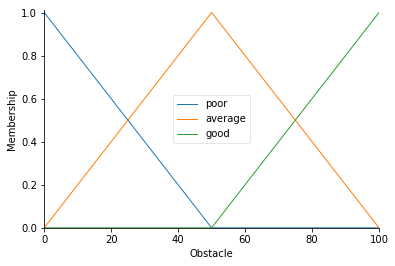

In [9]:
# Ploting obstacle
obstacle.view()

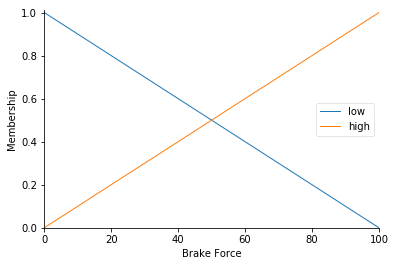

In [13]:
# Ploting brake force
brake_force.view()

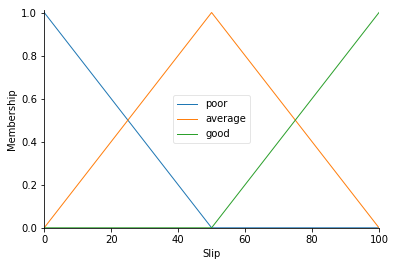

In [11]:
# Ploting slip
slip.view()

In [27]:
# Now it's time to define the rules of this system

# I'm going to create a rules array, so all the rules will be stored here 
rules = []

'''
rule1 = ctrl.Rule(obstacle['very near'] and brake_force['high'] and slip['unsafe'], abs_brake['minimum'])o
rules.append(rule1)
rule2 = ctrl.Rule(obstacle['very near'] & brake_force['high'] & slip['critical'], abs_brake['medium'])
rules.append(rule2)
rule3 = ctrl.Rule(obstacle['very near'] & brake_force['high'] & slip['safe'], abs_brake['maximum'])
rules.append(rule3)
rule4 = ctrl.Rule(obstacle['near'] & brake_force['high'] & slip['unsafe'], abs_brake['minimum'])o
rules.append(rule4)
rule5 = ctrl.Rule(obstacle['near'] & brake_force['high'] & slip['critical'], abs_brake['medium'])
rules.append(rule5)
rule6 = ctrl.Rule(obstacle['near'] & brake_force['high'] & slip['safe'], abs_brake['maximum'])
rules.append(rule6)
rule7 = ctrl.Rule(obstacle['near'] & brake_force['low'] & slip['safe'], abs_brake['maximum'])
rules.append(rule7)
rule8 = ctrl.Rule(obstacle['near'] & brake_force['low'] & slip['critical'], abs_brake['medium'])
rules.append(rule8)
rule9 = ctrl.Rule(obstacle['no obstacle'] & brake_force['low'] & slip['safe'], abs_brake['maximum'])
rules.append(rule9)
rule10 = ctrl.Rule(obstacle['no obstacle'] & brake_force['high'] & slip['critical'], abs_brake['medium'])
rules.append(rule10)
rule11 = ctrl.Rule(obstacle['no obstacle'] & brake_force['high'] & slip['unsafe'], abs_brake['minimum'])o
rules.append(rule11)
rule12 = ctrl.Rule(obstacle['no obstacle'] & brake_force['low'] & slip['unsafe'], abs_brake['minimum'])o
rules.append(rule12)
rule13 = ctrl.Rule(obstacle['no obstacle'] & brake_force['low'] & slip['critical'], abs_brake['medium'])
rules.append(rule13)
'''
rule0 = ctrl.Rule(antecedent=((obstacle['very near'] & brake_force['high'] & slip['unsafe'])  |
                             (obstacle['near'] & brake_force['high'] & slip['unsafe'])        |
                             (obstacle['no obstacle'] & brake_force['high'] & slip['unsafe']) |
                             (obstacle['no obstacle'] & brake_force['low'] & slip['unsafe'])),
                  consequent=abs_brake['minimum'], label='rule minimum')
rules.append(rule0)

# Now i'll create the control system for simulation
abs_brake_ctrl = ctrl.ControlSystem(rules)


AttributeError: 'DiGraph' object has no attribute 'add_path'